#### Ejemplo 2: Predicción de producción de energía solar (60 minutos).

Objetivo: Mostrar cómo la IA puede predecir la producción de energía solar basándose en datos meteorológicos.
Pasos:

1. Cargar un conjunto de datos históricos que incluya producción de energía y variables meteorológicas. https://www.kaggle.com/datasets/pythonafroz/solar-panel-images(opens in a new tab). 2. Este recurso proporciona datos de producción de energía solar y variables meteorológicas para varios países europeos
3. Preprocesar los datos (manejar valores faltantes, normalización).
4. Dividir los datos en conjuntos de entrenamiento y prueba.
5. Crear un modelo de regresión usando scikit-learn (Random Forest Regressor).
6. Entrenar el modelo con los datos de entrenamiento.
7. Evaluar el modelo con los datos de prueba.
8. Realizar predicciones con nuevos datos meteorológicos.

In [1]:
import os
import pandas as pd
import numpy as np
from kaggle.api.kaggle_api_extended import KaggleApi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

dataset_path = "solar_energy_dataset"
os.makedirs(dataset_path, exist_ok=True)

api.dataset_download_files("pythonafroz/solar-powe-generation-data", path=dataset_path, unzip=True)

print("Descarga completada. Archivos disponibles en:", os.listdir(dataset_path))

Dataset URL: https://www.kaggle.com/datasets/pythonafroz/solar-powe-generation-data
Descarga completada. Archivos disponibles en: ['Solar Power Plant Data.csv']


In [5]:
dataset_path

'solar_energy_dataset'

In [6]:

# Cargar datos
data_path = os.path.join(dataset_path, "Solar_Power_Plant_Data.csv")
df = pd.read_csv(data_path)

In [8]:
df.head()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date-Hour(NMT)       8760 non-null   object 
 1   WindSpeed            8760 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8760 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8760 non-null   int64  
 7   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 547.6+ KB


In [10]:

# Preprocesamiento de datos
df.dropna(inplace=True)  # Eliminar valores faltantes

In [11]:
# Selección de variables predictoras y variable objetivo
X = df[['AirTemperature', 'RelativeAirHumidity', 'WindSpeed', 'Radiation']]
y = df['SystemProduction']


In [12]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Entrenar modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# Evaluar el modelo
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [15]:
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 383.29810763755705
RMSE: 863.5640193367815


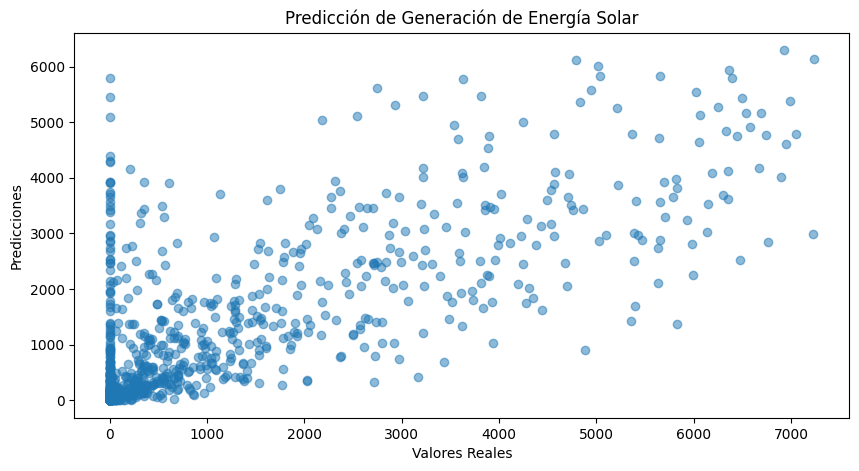

In [16]:
# Visualizar predicciones
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicción de Generación de Energía Solar")
plt.show()


In [17]:
df

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67,0.0
...,...,...,...,...,...,...,...,...
8755,31.12.2017-19:00,4.1,0,988.2,-4.8,-0.7,94,0.0
8756,31.12.2017-20:00,2.1,0,987.3,-5.0,-0.3,95,0.0
8757,31.12.2017-21:00,1.8,0,986.7,-5.3,0.2,93,0.0
8758,31.12.2017-22:00,2.2,0,986.0,-5.4,0.3,92,0.0


In [20]:
# Realizar predicciones con nuevos datos
nuevos_datos = pd.DataFrame({
    'AirTemperature': [25, 30, 35,-5],
    'RelativeAirHumidity': [40, 50, 60,100],
    'WindSpeed': [5, 10, 15,0.6],
    'Radiation': [500, 700, 900,-15]
})
predicciones_nuevas = model.predict(nuevos_datos)
print(f'Predicción de producción de energía: {predicciones_nuevas} kWh')
#print("Predicciones para nuevos datos:", predicciones_nuevas)


Predicción de producción de energía: [4.88679330e+03 4.88228336e+03 5.23354836e+03 3.42500000e-01] kWh


In [25]:
import seaborn as sns

/tmp/ipykernel_63446/2439517644.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


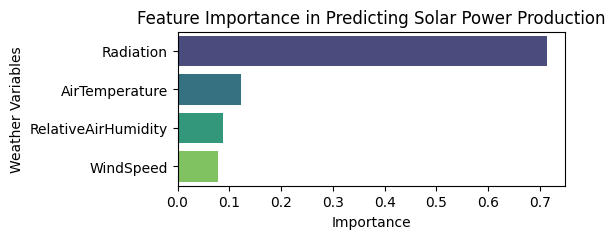

In [30]:
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to visualize the feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(5, 2))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance in Predicting Solar Power Production')
plt.xlabel('Importance')
plt.ylabel('Weather Variables')
plt.show()

